In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
datas=[]
for i in range(9):
    datas.append(pd.read_csv(f"/content/drive/MyDrive/Copy of {i+1}_label.csv"))

In [3]:
df = datas[0]
for i in datas[1:]:
    df = df.append(i)

Check if any non numerical values exist

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12509332 entries, 0 to 219735
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   acc_x   float64
 2   acc_y   float64
 3   acc_z   float64
 4   gyr_x   float64
 5   gyr_y   float64
 6   gyr_z   float64
 7   mag_x   float64
 8   mag_y   float64
 9   mag_z   float64
 10  label   int64  
dtypes: float64(9), int64(2)
memory usage: 1.1 GB


Check if any values are null


In [5]:
df.isnull().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

Check for dataset imbalance

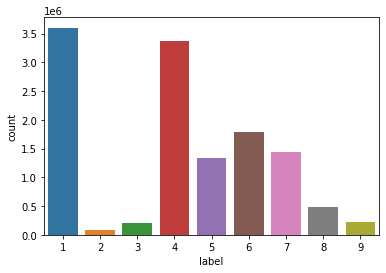

In [6]:
sns.countplot(x="label", data = df)

Test the correlation for the imbalanced dataset

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
time,1.00,-0.10,0.00,0.03,0.00,0.00,-0.00,-0.02,-0.02,-0.02,0.03
acc_x,-0.10,1.00,0.12,-0.07,-0.01,0.00,-0.00,-0.41,0.11,0.14,0.15
acc_y,0.00,0.12,1.00,-0.27,-0.04,0.02,0.02,-0.08,0.32,0.89,-0.02
acc_z,0.03,-0.07,-0.27,1.00,0.02,-0.01,-0.01,0.13,-0.19,-0.39,-0.10
gyr_x,0.00,-0.01,-0.04,0.02,1.00,0.00,-0.10,-0.00,-0.02,-0.03,-0.00
gyr_y,0.00,0.00,0.02,-0.01,0.00,1.00,0.04,-0.01,0.02,0.01,0.00
gyr_z,-0.00,-0.00,0.02,-0.01,-0.10,0.04,1.00,0.00,-0.00,0.02,0.00
mag_x,-0.02,-0.41,-0.08,0.13,-0.00,-0.01,0.00,1.00,-0.34,-0.16,-0.11
mag_y,-0.02,0.11,0.32,-0.19,-0.02,0.02,-0.00,-0.34,1.00,0.38,0.09
mag_z,-0.02,0.14,0.89,-0.39,-0.03,0.01,0.02,-0.16,0.38,1.00,0.03


In [8]:
y = df['label']
x = df.drop(['label', 'time'], axis=1)

Scale the data to 0 mean and unit variance

In [9]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler("auto")
x, y = sampler.fit_sample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
# The labels are from 1 to 9, scale them to 0 - 8
y_scaled = y - 1

In [13]:
import tensorflow as tf
import keras.layers as layers
import keras.models as models
import keras.optimizers as optim

Create a simple DNN Classifier

In [14]:
class DNN(models.Model):
    def __init__(self):
        super(DNN, self).__init__()

        self.seq = models.Sequential([
                                      layers.Dense(12, activation='tanh'),
                                      layers.Dense(32, activation='tanh'),
                                      layers.Dropout(0.3),
        ])
        self.output_layer= models.Sequential([
                                      layers.Dense(64, activation='tanh'),
                                      layers.Dense(9, activation='softmax')
        ])
    
    def call(self, inp):
        x = self.seq(inp)
        x = tf.concat([x, inp], axis=1)
        x = self.output_layer(x)
        return x

In [15]:
dnn = DNN()

In [16]:
dnn.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['acc'])

In [18]:
history = dnn.fit(x_scaled, y_scaled, batch_size=128)

253257/253257 [==============================] - 444s 2ms/step - loss: 0.7084 - acc: 0.7469
